<h2>IS453 Financial Analytics</h2><h2>Week 7 - Credit Analysis EDA and Data Preparation</h2>

## HMEQ Dataset

The HMEQ data set reports characteristics and delinquency information for 5,960 home equity loans. A home equity loan is a loan where the obligor uses the equity of his or her home as the underlying collateral. 
The data was originally taken from the Credit Risk Analytics: "Measurement Techniques, Applications, and Examples in SAS", book website - https://www.bartbaesens.com/book/6/credit-risk-analytics.
A cleaner version of the data is available in Kaggle - https://www.kaggle.com/akhil14shukla/loan-defaulter-prediction/data


**Variables definition**

1. BAD: Binary response variable
    - 1 = applicant defaulted on loan or seriously delinquent; 
    - 0 = applicant paid loan or customer is current on loan payments. This is the class column.
2. LOAN: Requested loan amount
3. MORTDUE: Amount due on existing mortgage
4. VALUE: Value of current property
5. REASON: 
    - DebtCon = debt consolidation(customer uses home equity loan to pay back high interest loans)
    - HomeImp = home improvement
6. JOB: Occupational categories
    - ProfExe
    - Mgr
    - Office
    - Self
    - Sales
    - Other
7. YOJ: Years at present job
8. DEROG: Number of major derogatory reports(issued for loans taken in the past when customer fails to keep up the contract or payback on time).
9. DELINQ: Number of delinquent credit lines
10. CLAGE: Age of oldest credit line in months
11. NINQ: Number of recent credit inquiries
12. CLNO: Number of credit lines
13. DEBTINC: Debt-to-income ratio in percent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Exploratory Data Analysis (EDA)




In [2]:
# sample code
# import and examine the historical dataset
hmeq_data = pd.read_csv('hmeq_data.csv')

hmeq_data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


**Ex Qn 1**

Based on the variable definitions:
- Which variables are continuous and which are discrete? 
- Which variables are time-based and how are they measured?
- Do any of the variables logically seem like they might be closely correlated to one another?

Your answer here: 

- Continuous: LOAN, MORTDUE, VALUE, YOJ, CLAGE, DEBTINC
- Discrete: BAD, REASON, JOB, DEROG, DELINQ, NINQ, CLNO
- Time-based: YOJ (year), CLAGE (month) 
- BAD & DELINQ

### Univariate Analysis
** Info and Summary Statistics**

In [3]:
# sample code
# review data counts and types
hmeq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [6]:
# sample code
# review summary statistics
hmeq_data.describe(include = 'all')


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


**Histograms and Boxplots of Continuous Variables**

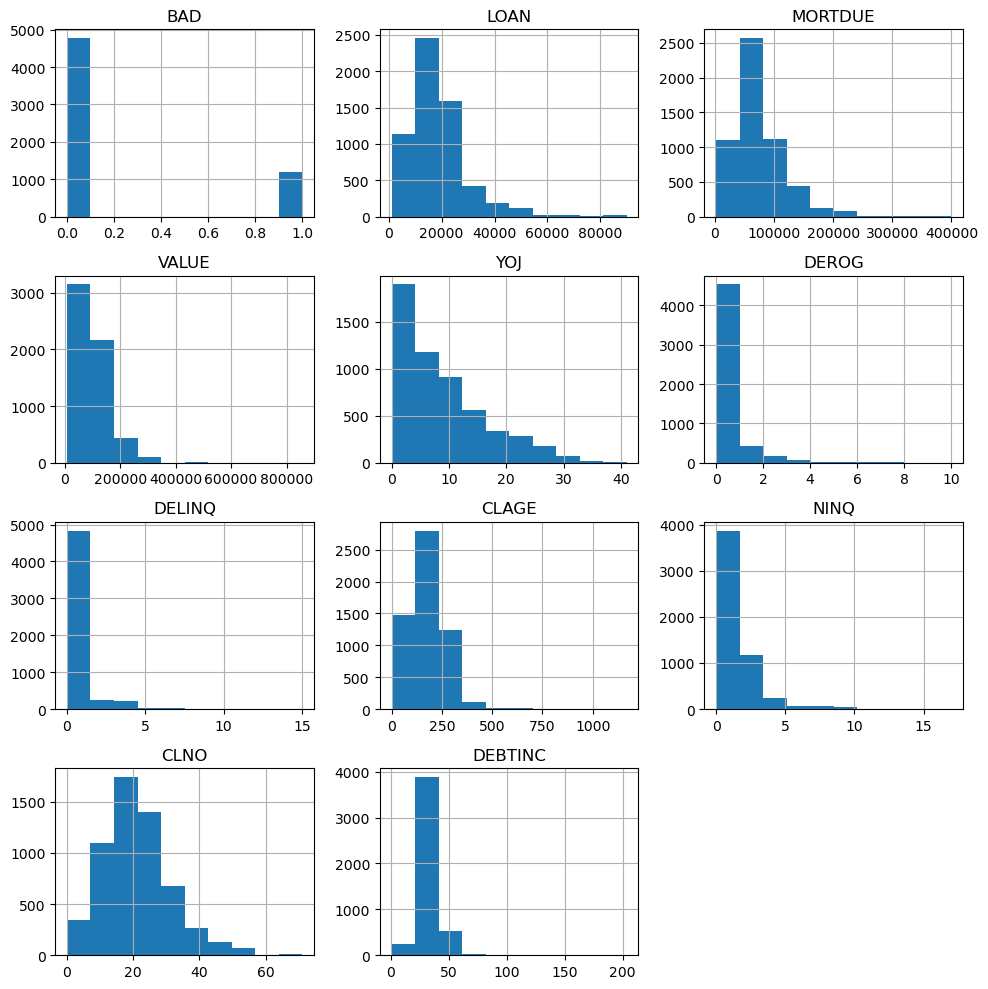

In [8]:
#sample code
# examine the distirbution of the indvidual variables
hmeq_data.hist(figsize=(10,10))
plt.tight_layout()

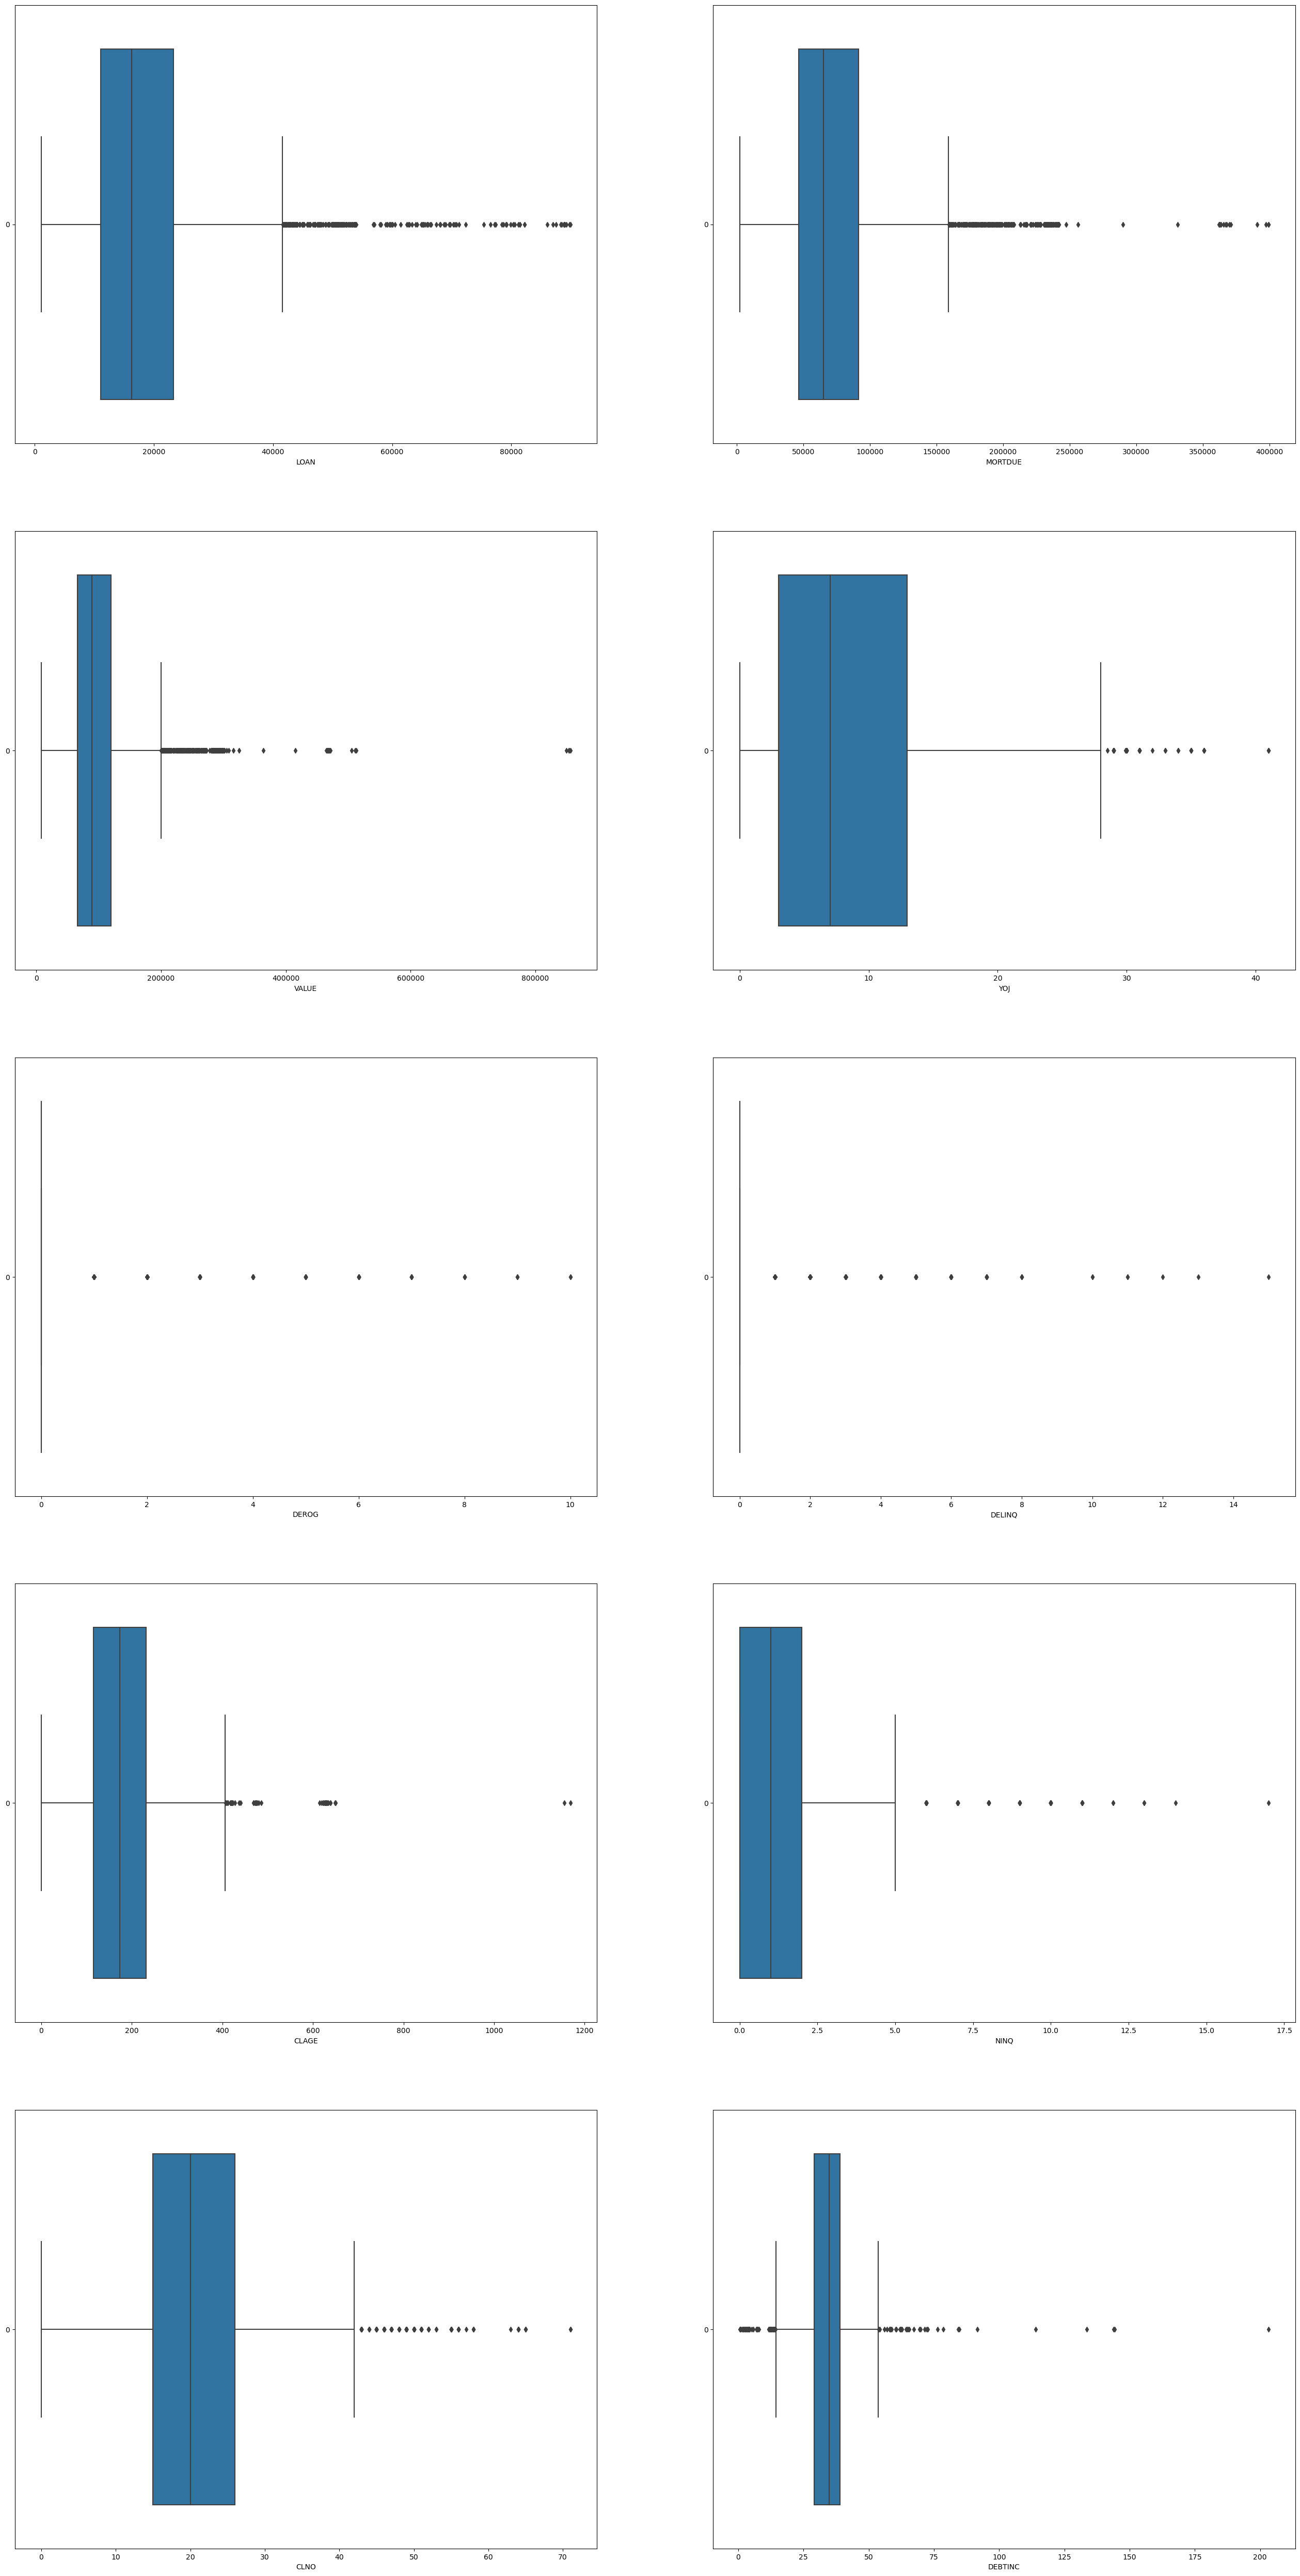

In [10]:
# sample code
# create boxplots

columns_to_plot = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
row_count=int(np.ceil(len(columns_to_plot)/2))

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 64))

for i, axis in enumerate(fig.axes):
    sns.boxplot(ax=axis, data=hmeq_data[columns_to_plot[i]],orient='h')
    axis.set_xlabel(str(columns_to_plot[i]))
    if i == len(columns_to_plot)-1: 
         break
    
# Show the plot
plt.show()


**Ex Qn 2**
- What is the distribution shape of the variables? Do they look like they are normally distributed? 
- Do any columns have outlier values that seem inconsistent with their definitions?

Your answer here: 
- Not normally distributed, mostly right skewed
- Outliers: CLAGE (outlier value very far, the value of outlier is 1200 months which is 100 years, seems not possible)

**Bar Charts of Categorical Variables**

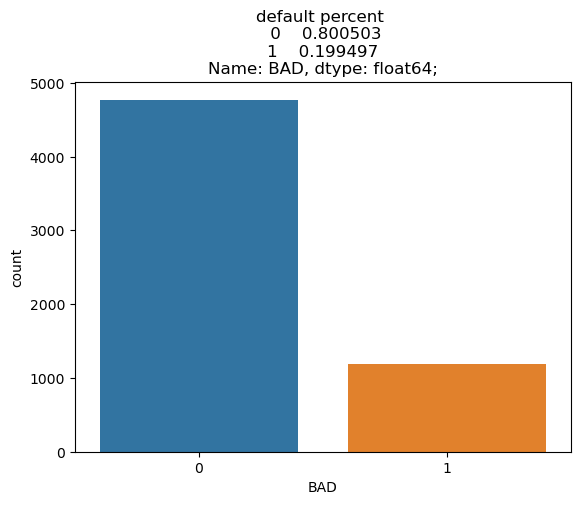

In [11]:
# sample code
# percent of bads/default
sns.countplot(x = hmeq_data['BAD'])
normalise_count = hmeq_data['BAD'].value_counts(normalize = True)

# we are using the output of value_counts() normalised as the chart title
ax = plt.title('default percent \n {};'.format(normalise_count))

Follow the same steps to create plots for the JOB and REASON varibles.

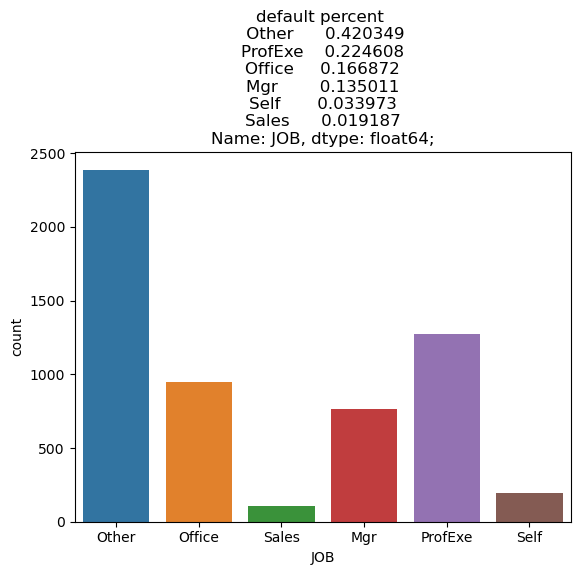

In [12]:
# your code here
sns.countplot(x = hmeq_data['JOB'])
normalise_count = hmeq_data['JOB'].value_counts(normalize = True)

# we are using the output of value_counts() normalised as the chart title
ax = plt.title('default percent \n {};'.format(normalise_count))

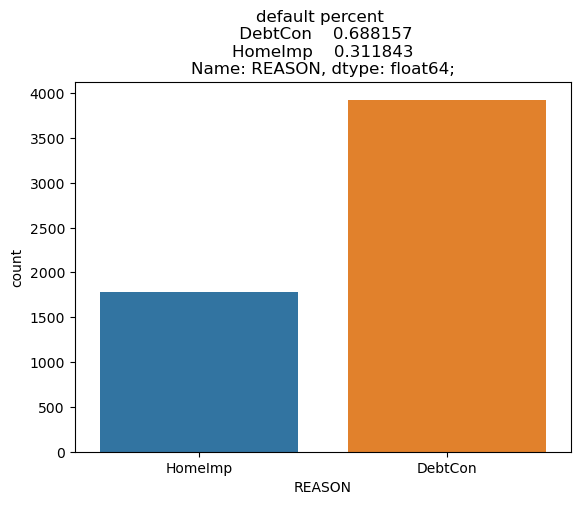

In [13]:
sns.countplot(x = hmeq_data['REASON'])
normalise_count = hmeq_data['REASON'].value_counts(normalize = True)

# we are using the output of value_counts() normalised as the chart title
ax = plt.title('default percent \n {};'.format(normalise_count))

**Ex Qn 3**
- What is the overall default rate (% of bads)?
- Which job types have the lowest overall representation in the sample?


Your answer here: 
- Overall default rate: 19.9497%
- Sales 

## Bivariate analysis
**Analyse continuous variables using KDE plots**

Text(0.5, 1.0, 'Distribution of Loan amount by Default Rate')

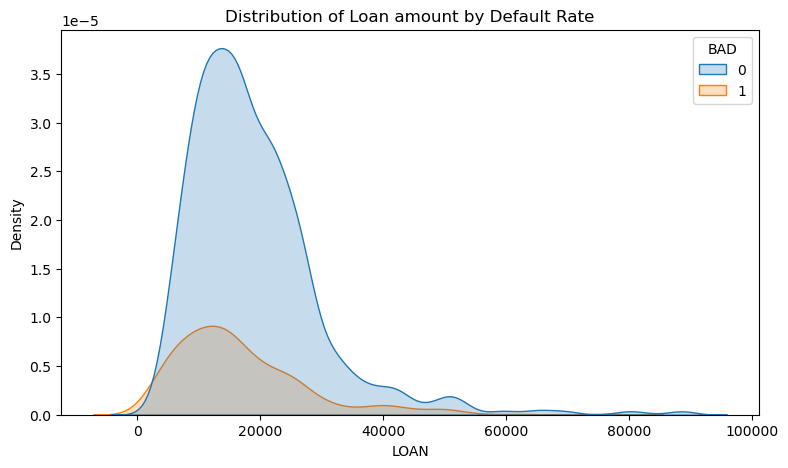

In [11]:
# sample code
plt.figure(figsize=(9,5))
sns.kdeplot(data=hmeq_data, x="LOAN", hue="BAD", fill = True)
plt.title('Distribution of Loan amount by Default Rate')

Follow the same steps to create plots for the other continuous variables.

- Continuous: LOAN, MORTDUE, VALUE, YOJ, CLAGE, DEBTINC 

Text(0.5, 1.0, 'Distribution of Mortdue amount by Default Rate')

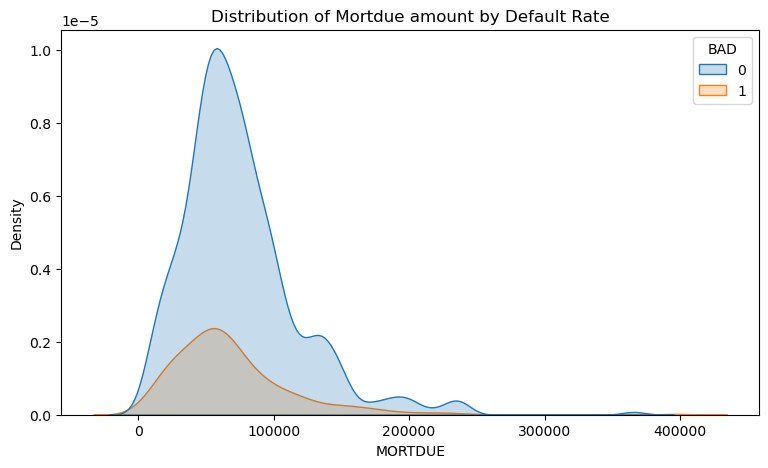

In [12]:
# your code here
plt.figure(figsize=(9,5))
sns.kdeplot(data=hmeq_data, x="MORTDUE", hue="BAD", fill = True)
plt.title('Distribution of Mortdue amount by Default Rate')

Text(0.5, 1.0, 'Distribution of Value by Default Rate')

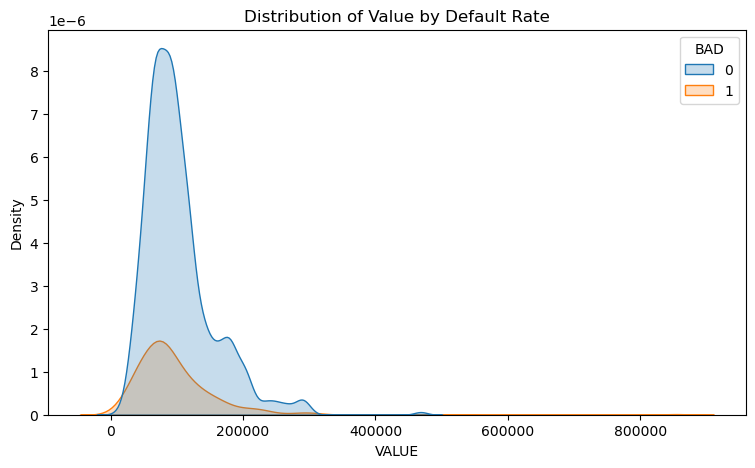

In [13]:
# your code here
plt.figure(figsize=(9,5))
sns.kdeplot(data=hmeq_data, x="VALUE", hue="BAD", fill = True)
plt.title('Distribution of Value by Default Rate')

Text(0.5, 1.0, 'Distribution of Years at Present Job by Default Rate')

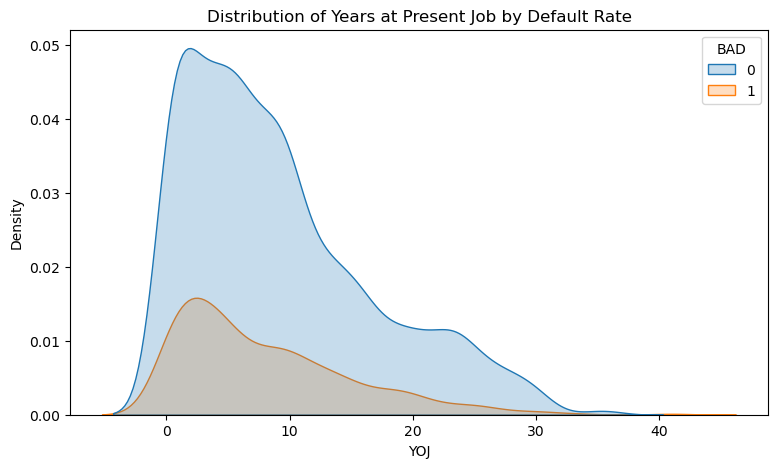

In [15]:
# your code here
plt.figure(figsize=(9,5))
sns.kdeplot(data=hmeq_data, x="YOJ", hue="BAD", fill = True)
plt.title('Distribution of Years at Present Job by Default Rate')

Text(0.5, 1.0, 'Distribution of Age of oldest credit line in months by Default Rate')

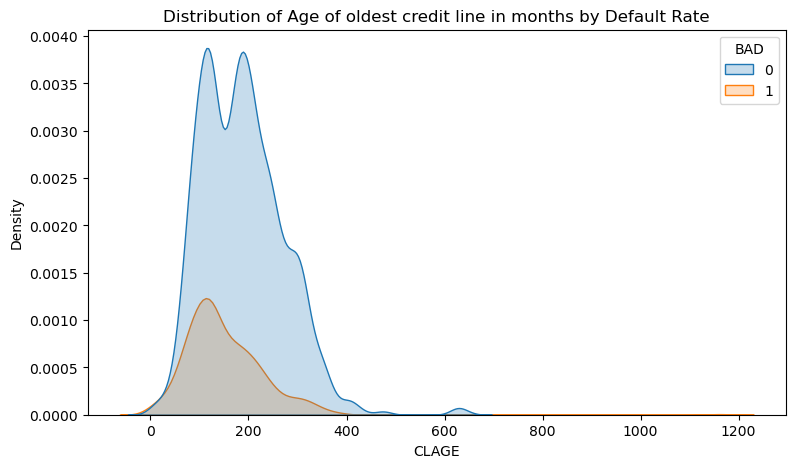

In [16]:
# your code here
plt.figure(figsize=(9,5))
sns.kdeplot(data=hmeq_data, x="CLAGE", hue="BAD", fill = True)
plt.title('Distribution of Age of oldest credit line in months by Default Rate')

Text(0.5, 1.0, 'Distribution of Debt-to-income ratio in % by Default Rate')

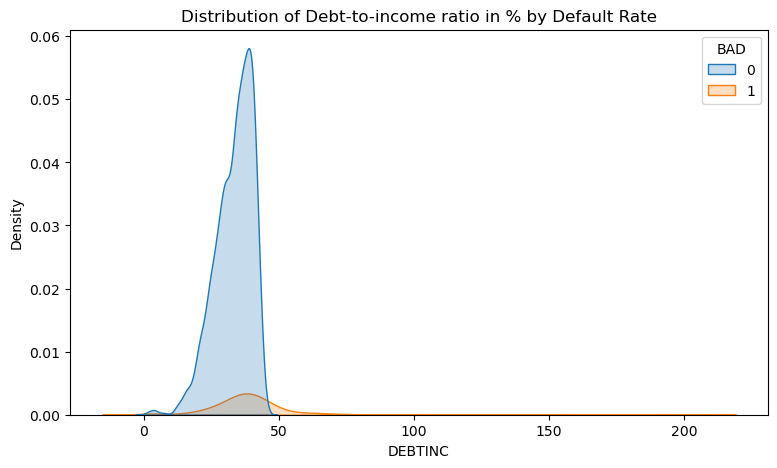

In [17]:
# your code here
plt.figure(figsize=(9,5))
sns.kdeplot(data=hmeq_data, x="DEBTINC", hue="BAD", fill = True)
plt.title('Distribution of Debt-to-income ratio in % by Default Rate')

**Analyse categorical variables using bar charts**

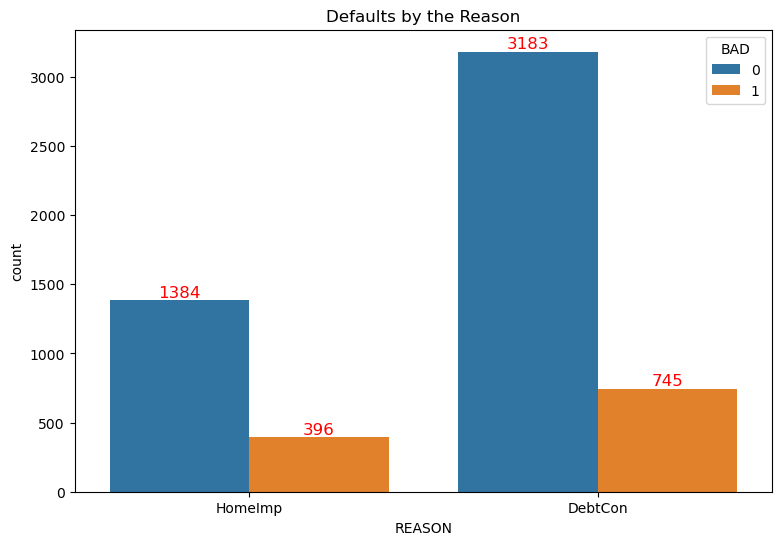

In [14]:
#sample code
# goods vs bads by variable for REASON type
plt.figure(figsize=(9,6))
ax = sns.countplot(x= hmeq_data['REASON'], hue=hmeq_data['BAD'])
plt.title('Defaults by the Reason')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
            fontsize=12, color='red', ha='center', va='bottom')

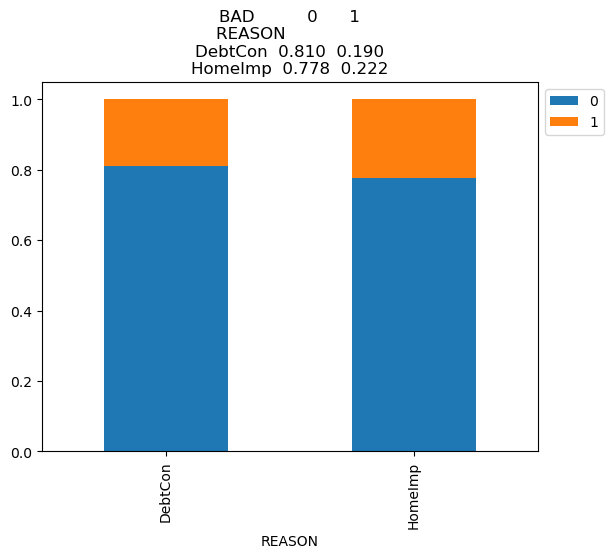

In [18]:
#sample code
# plot a percent stacked bar chart for bivariate analysis
df_JobBivariate = hmeq_data.groupby('REASON')['BAD'].value_counts(normalize = True).unstack()

ax = df_JobBivariate.plot(kind='bar', stacked='True', title = str(df_JobBivariate.round(3)))
#place legend outside the chart
ax.legend(bbox_to_anchor=(1.0, 1.0))

Follow the same steps to create plots for JOB.

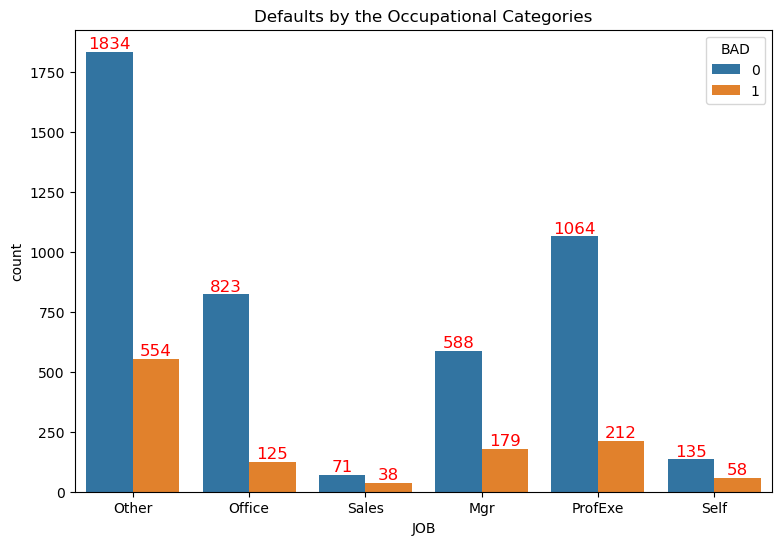

In [19]:
# your code here
# goods vs bads by variable for JOB type
plt.figure(figsize=(9,6))
ax = sns.countplot(x= hmeq_data['JOB'], hue=hmeq_data['BAD'])
plt.title('Defaults by the Occupational Categories')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
            fontsize=12, color='red', ha='center', va='bottom')

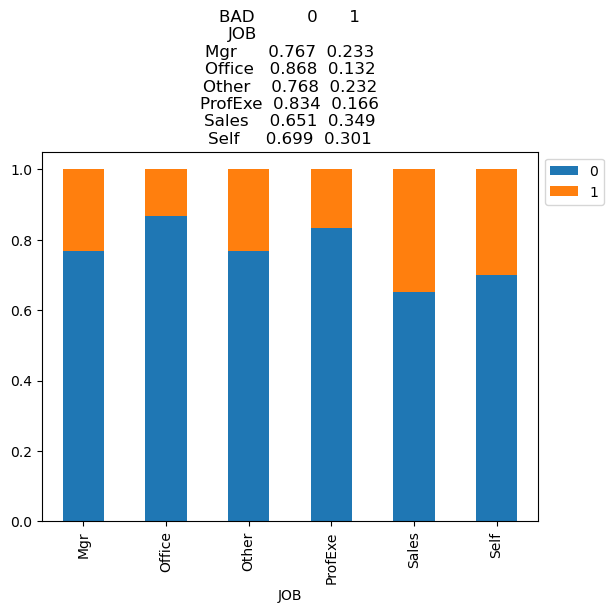

In [20]:
#sample code
# plot a percent stacked bar chart for bivariate analysis
df_JobBivariate = hmeq_data.groupby('JOB')['BAD'].value_counts(normalize = True).unstack()

ax = df_JobBivariate.plot(kind='bar', stacked='True', title = str(df_JobBivariate.round(3)))
#place legend outside the chart
ax.legend(bbox_to_anchor=(1.0, 1.0))

**Analyse correlation of continuous variables using heat map**

<AxesSubplot:>

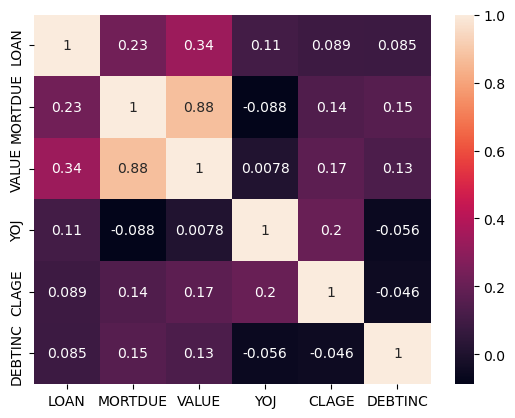

In [23]:
# your code here
continuous = hmeq_data[["LOAN", "MORTDUE", "VALUE", "YOJ","CLAGE","DEBTINC"]]
corr = continuous.corr() 
sns.heatmap(corr, annot=True)

**DYI Qn 1**
- What is the overall default rate (% of bads)?
- Which job types have the highest percentage default rate?
- Which job types have the lowest overall representation in the sample?
- Are the distirutions of goods and bads for LOAN value aligned with one another?  
- Which variables have the highest correlation? What could logically explain that relationship?

Your answer here: 

- Overall default rate = 19.9497%
- Sales
- Sales
- Yes, they have a similar shape
- Value and Mortdue. With greater requested loan amount, it is logical for the amount due on existing mortgage to be greater as well. 

**Examine rows and columns for missing data**

In [24]:
#sample code
# check for missing data
hmeq_data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

**DYI Qn 2**
- How many rows have more than 3 missing values?  What percentage of total rows is that?
- Which 4 columns have the greatest number missing values? What percentage of total rows are the missing values?

In [40]:
# your code here
counter = 0 
for i in range(0,len(hmeq_data)-1): 
    if hmeq_data.loc[i].isnull().sum().sum() > 3: 
        counter += 1

rows = len(hmeq_data.axes[0])
#% of total rows w more than 3 missing values 
percentage = (counter/rows) * 100
print(percentage)

debtinc = (1267/rows) * 100 
derog = (708/rows) * 100 
delinq = (580/rows) * 100 
mortdue = (518/rows) * 100 
print(debtinc, derog, delinq, mortdue)

5.687919463087248
21.258389261744966 11.879194630872483 9.731543624161073 8.691275167785236


In [39]:
DEBTINC = (1267 + 708 + 580 + 518)/ (hmeq_data.isnull().sum().sum()) * 100
print(percentage_of_columns)

58.300132802124836


Your answer here: 
- 5.688% 
- DEBTINC (21.26%), DEROG (11.88%), DELINQ (9.732%), MORTDUE (8.691%)